<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/PCA%2BFeature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Importance
อ้างอิง : https://youtu.be/Uojkhn-EXac?si=6n7IHb0XQWt9Rj7g

PCA
อ้างอิง : https://youtu.be/z8APHNo1iA4?si=r-lY4vGMC0a2lneF

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: Outliers/outlier_missfr.xlsx')

In [13]:
df.shape #ข้อมูลมีทั้งหมด 52620 แถว  82 คอลัมน์

(52620, 82)

In [14]:
df.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient',
       'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failu

In [15]:
df.describe()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,eGFR_t1,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
count,5.262000e+04,5.262000e+04,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,9.847286e+05,6.048275e+06,-2.169255,0.088027,0.868890,0.043082,53.188739,8.887628,30.067104,1.047681,...,7.279853,246.952447,120.499811,6.519305,175.662508,139.219384,111.819297,52.145962,88.277345,0.511517
std,7.852055e+05,1.741735e+06,9.785498,0.283337,0.337524,0.203045,16.696552,27.112374,43.033413,8.089661,...,2.276061,74.997597,49.196827,1.399190,40.744457,72.447643,34.752885,12.711384,58.046303,0.499872
min,2.299000e+03,2.705230e+06,-79.002653,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,...,1.250000,31.000000,40.000000,4.000000,29.000000,20.000000,10.000000,20.000000,0.000000,0.000000
25%,3.048090e+05,4.588604e+06,-6.381052,0.000000,1.000000,0.000000,43.810000,0.000000,0.000000,0.000000,...,5.890000,202.000000,93.000000,5.600000,152.000000,94.457500,89.000000,44.000000,39.822000,0.000000
50%,8.718500e+05,5.984422e+06,-1.706494,0.000000,1.000000,0.000000,54.660000,0.000000,0.000000,0.000000,...,6.971500,241.000000,104.000000,6.045000,173.050000,117.000000,110.000000,50.000000,76.425000,1.000000
75%,1.388184e+06,7.506620e+06,2.488436,0.000000,1.000000,0.000000,63.220000,0.000000,70.000000,0.000000,...,8.200000,285.000000,131.402500,7.000000,193.672500,166.490000,128.000000,59.780000,125.958250,1.000000
max,3.321289e+06,9.348880e+06,106.892857,1.000000,1.000000,1.000000,142.900000,365.000000,400.000000,200.000000,...,29.900000,998.000000,989.000000,15.000000,865.000000,856.000000,300.000000,196.000000,499.000000,1.000000


##Losso_Feature

In [37]:
#library
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split


Slope

In [38]:
# Preview
features = df[['Age', 'InPatient', 'OutPatient', 'Emergency', 'Sex', 'NATNL',
               'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
               'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
               'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
               'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
               'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
               'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
               'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'BMI', 'BSA', 'Diastolic-BP',
               'Systolic-BP', 'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia',
               'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
               'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
               'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
               'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
               'D16-Hematologic-malignancy', 'L2-BUN',
               'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
               'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
               'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
               'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
               'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
               'L28-UrineProtein-Cr-ratio']]
target = df['Slopes']

# X and y values
X = features.values
y = target.values

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
features.shape

(52620, 70)

In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

search = GridSearchCV(
    estimator=pipeline,
    param_grid={'model__alpha': np.arange(0.1, 3, 0.1)},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=3
)
search.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ................model__alpha=0.1;, score=-89.685 total time=   0.2s
[CV 2/5] END ................model__alpha=0.1;, score=-88.639 total time=   0.2s
[CV 3/5] END ................model__alpha=0.1;, score=-93.186 total time=   0.3s
[CV 4/5] END ................model__alpha=0.1;, score=-90.346 total time=   0.2s
[CV 5/5] END ................model__alpha=0.1;, score=-89.780 total time=   0.3s
[CV 1/5] END ................model__alpha=0.2;, score=-90.330 total time=   0.2s
[CV 2/5] END ................model__alpha=0.2;, score=-89.099 total time=   0.2s
[CV 3/5] END ................model__alpha=0.2;, score=-93.776 total time=   0.2s
[CV 4/5] END ................model__alpha=0.2;, score=-90.986 total time=   0.2s
[CV 5/5] END ................model__alpha=0.2;, score=-90.641 total time=   0.2s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-90.928 total time=   0.2s
[CV 2/5] END model__alpha=0.30000000000000004;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [41]:
search.best_params_

{'model__alpha': 0.1}

In [42]:
coef = search.best_estimator_[1].coef_
coef


array([ 4.48012354e-01,  3.66806266e-01, -0.00000000e+00, -0.00000000e+00,
        1.24015339e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -6.93165947e-03,  0.00000000e+00,  0.00000000e+00,
       -3.23656557e-02, -0.00000000e+00, -1.06643318e-01, -0.00000000e+00,
       -0.00000000e+00,  9.04855289e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.44328106e-02,
        0.00000000e+00,  0.00000000e+00,  9.37720286e-02,  0.00000000e+00,
       -0.00000000e+00, -5.25565242e-01, -2.02393886e-02,  0.00000000e+00,
        0.00000000e+00, -5.32575758e-02, -0.00000000e+00,  2.16273307e-04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.35766529e-02, -0.00000000e+00, -0.00000000e+00,
        3.65802249e-02, -0.00000000e+00,  9.91025941e-01, -0.00000000e+00,
        0.00000000e+00, -

In [43]:
slope = np.array(features.columns)[coef != 0]
slope

array(['Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G5M1-Ketoanalog-amino-acid',
       'BMI', 'Systolic-BP', 'D1-Hypertension', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L8-Uric', 'L9-Calcium',
       'L10-Phosphorus', 'L11-Albumin', 'L15-Platelet', 'L20-HbA1c',
       'L22-Triglyceride', 'L23-LDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio'], dtype=object)

In [44]:
slope .shape

(25,)

eGFR

In [45]:
features = df[['Age', 'InPatient', 'OutPatient', 'Emergency', 'Sex', 'NATNL',
               'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
               'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
               'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
               'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
               'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
               'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
               'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'BMI', 'BSA', 'Diastolic-BP',
               'Systolic-BP', 'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia',
               'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
               'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
               'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
               'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
               'D16-Hematologic-malignancy', 'L2-BUN',
               'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
               'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
               'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
               'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
               'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
               'L28-UrineProtein-Cr-ratio']]
target = df['L1-eGFR']

# X and y values
X = features.values
y = target.values

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])
search = GridSearchCV(
    estimator=pipeline,
    param_grid={'model__alpha': np.arange(0.1, 3, 0.1)},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=3
)
search.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ...............model__alpha=0.1;, score=-130.156 total time=   0.2s
[CV 2/5] END ...............model__alpha=0.1;, score=-132.527 total time=   0.2s
[CV 3/5] END ...............model__alpha=0.1;, score=-139.177 total time=   0.2s
[CV 4/5] END ...............model__alpha=0.1;, score=-133.207 total time=   0.3s
[CV 5/5] END ...............model__alpha=0.1;, score=-128.394 total time=   0.3s
[CV 1/5] END ...............model__alpha=0.2;, score=-131.413 total time=   0.2s
[CV 2/5] END ...............model__alpha=0.2;, score=-133.804 total time=   0.2s
[CV 3/5] END ...............model__alpha=0.2;, score=-140.377 total time=   0.3s
[CV 4/5] END ...............model__alpha=0.2;, score=-134.093 total time=   0.2s
[CV 5/5] END ...............model__alpha=0.2;, score=-129.642 total time=   0.2s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-133.045 total time=   0.2s
[CV 2/5] END model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [47]:
search.best_params_

{'model__alpha': 0.1}

In [48]:
coef = search.best_estimator_[1].coef_
coef

array([-3.62086608e+00,  6.75649547e-01, -2.43979681e-01,  0.00000000e+00,
       -9.33555004e-01,  0.00000000e+00,  2.66515981e-01, -1.81868468e-01,
        3.75852675e-01,  3.68181114e-01, -0.00000000e+00, -5.62233980e-01,
        6.46434428e-02,  6.24101864e-01,  1.27738687e+00, -4.32381861e-01,
       -0.00000000e+00, -1.00618526e-01,  0.00000000e+00, -4.45614227e-01,
       -4.53436806e-01, -2.67768949e-01, -0.00000000e+00, -0.00000000e+00,
       -2.71369678e-01, -0.00000000e+00, -3.91261350e-01, -2.18188514e-01,
        0.00000000e+00, -6.73777999e-03,  0.00000000e+00,  9.77884357e-03,
        0.00000000e+00, -2.47570821e-02, -0.00000000e+00, -2.80577570e-01,
       -0.00000000e+00,  6.02456557e-02,  1.56704155e-03,  2.59562443e-02,
        0.00000000e+00,  0.00000000e+00,  2.86812247e-01, -0.00000000e+00,
        3.40205279e-02,  0.00000000e+00,  2.08081963e-02,  6.13540832e-02,
        0.00000000e+00,  0.00000000e+00, -8.50820070e+00,  3.43190954e-01,
        0.00000000e+00, -

In [49]:
egfr = np.array(features.columns)[coef != 0]
egfr

array(['Age', 'InPatient', 'OutPatient', 'Sex', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
       'G1M8-Alpha-blocker', 'G4M2-Febuxostat',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G4M3-Uricosuric-agent', 'BSA', 'Systolic-BP',
       'D2-Diabetes-mellitus', 'D4-SLE', 'D5-Systemic-sclerosis',
       'D6-Rheumatoid-arthritis', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L2-BUN',
       'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L22-Triglyceride', 'L23-LDL-Cholesterol',
       'L24-HDL-Cholesterol', 'L28-UrineProtein-Cr-ratio'], dtype=object)

In [50]:
egfr.shape

(48,)

#PCA

slope = ['Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G5M1-Ketoanalog-amino-acid',
       'BMI', 'Systolic-BP', 'D1-Hypertension', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L8-Uric', 'L9-Calcium',
       'L10-Phosphorus', 'L11-Albumin', 'L15-Platelet', 'L20-HbA1c',
       'L22-Triglyceride', 'L23-LDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']

egfr = ['Age', 'InPatient', 'OutPatient', 'Sex', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G3M3-Fibrate', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
       'G1M8-Alpha-blocker', 'G4M2-Febuxostat',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G4M3-Uricosuric-agent', 'BSA', 'Systolic-BP',
       'D2-Diabetes-mellitus', 'D4-SLE', 'D5-Systemic-sclerosis',
       'D6-Rheumatoid-arthritis', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L2-BUN',
       'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L22-Triglyceride', 'L23-LDL-Cholesterol',
       'L24-HDL-Cholesterol', 'L28-UrineProtein-Cr-ratio']

In [ ]:
slope = [ 'Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA', 'G2M2-Metformin', 'G3M3-Fibrate', 'G5M1-Ketoanalog-amino-acid', 'BMI', 'Systolic-BP', 'D1-Hypertension', 'D4-SLE', 'D6-Rheumatoid-arthritis', 'D12-Thalassemia', 'D15-Solid-malignancy', 'L2-BUN', 'L8-Uric', 'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L15-Platelet', 'L20-HbA1c', 'L22-Triglyceride', 'L23-LDL-Cholesterol', 'L28-UrineProtein-Cr-ratio']
slope = df[slope]
slope.head()

In [ ]:
egfr = ['Age', 'InPatient', 'OutPatient', 'Sex', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G3M3-Fibrate', 'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G4M2-Febuxostat', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid', 'G4M3-Uricosuric-agent', 'BSA', 'Systolic-BP', 'D2-Diabetes-mellitus', 'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D9-HCV-infection', 'D11-Heart-failure', 'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L2-BUN', 'L4-Sodium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin', 'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride', 'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol', 'L28-UrineProtein-Cr-ratio']
egfr = df[egfr]
egfr.head()

In [58]:
# หาคอลัมน์ที่ซ้ำกัน
common_columns = list(set(slope.columns).intersection(egfr.columns))
len(common_columns)

20

In [60]:
# หาคอลัมน์ที่ไม่ซ้ำกันใน slope
unique_columns_slope = list(set(slope.columns).difference(common_columns))
len(unique_columns_slope)

5

In [61]:
# หาคอลัมน์ที่ไม่ซ้ำกันใน egfr
unique_columns_egfr = list(set(egfr.columns).difference(common_columns))
len(unique_columns_egfr)

28

In [62]:
# นำคอลัมน์ทั้งหมดมารวมกัน
selected_features = common_columns + unique_columns_slope + unique_columns_egfr

# ลำดับคอลัมน์ตาม slope
slope_columns_order = slope.columns.tolist()

# ลำดับคอลัมน์ตาม egfr
egfr_columns_order = egfr.columns.tolist()

# นำคอลัมน์ทั้งหมดมารวมกัน โดยให้ลำดับตาม slope แล้ว egfr
selected_features_order = slope_columns_order + [col for col in egfr_columns_order if col not in slope_columns_order]

# สร้าง DataFrame ที่มีเฉพาะ feature ที่เลือกและเรียงลำดับตามลำดับที่กำหนด
data = df[selected_features_order]
data.head()


,Age,InPatient,Sex,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G5M1-Ketoanalog-amino-acid,BMI,Systolic-BP,...,D13-Kidney-stone,D14-Valvular-heart-disease,L4-Sodium,L6-Chloride,L7-Bicarbonate,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L19-Blood-sugar,L24-HDL-Cholesterol
0,73,0,1,0,0,0,0,0,20.80,127.0,...,0,0,142.18,103.70,26.199,12.830,39.367,4.9248,91.0,99.0
1,74,0,1,0,0,0,0,0,20.27,105.0,...,0,0,141.79,102.99,26.881,13.498,41.270,5.1634,86.0,73.0
2,75,0,1,0,0,0,0,0,20.72,138.0,...,0,0,143.00,103.00,29.700,10.100,32.400,9.4100,100.0,65.0
3,76,0,1,35,0,0,0,0,20.27,134.0,...,0,0,141.58,102.78,27.198,12.653,39.053,4.3718,89.0,76.0
4,78,0,1,0,0,0,0,0,19.05,103.0,...,0,0,141.00,102.00,27.200,10.700,34.600,5.4200,88.0,60.0


# StandardScaler


In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [67]:
# สร้าง StandardScaler
scaler = StandardScaler()

# นำข้อมูลมาทำการ scale
# คอลัมน์ที่ไม่ต้องการทำ scaling ถูกนำออก
columns_to_exclude = ['Sex']

# ดึงข้อมูลที่ต้องการทำ scaling จากตัวแปร data
data_to_scale = data.drop(columns=columns_to_exclude)
scale_data = scaler.fit_transform(data_to_scale)

# นำข้อมูลที่ถูก scale แล้วไปใส่ใน DataFrame ใหม่
scale_data = pd.DataFrame(scale_data, columns=data_to_scale.columns)
scale_data['Sex'] = data['Sex']
scale_data


,Age,InPatient,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G5M1-Ketoanalog-amino-acid,BMI,Systolic-BP,D1-Hypertension,...,D14-Valvular-heart-disease,L4-Sodium,L6-Chloride,L7-Bicarbonate,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L19-Blood-sugar,L24-HDL-Cholesterol,Sex
0,0.531249,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,-1.055973,-0.525000,-0.518024,...,-0.093814,0.786678,0.656985,0.448812,0.235841,0.254801,-1.034716,-0.599634,3.686025,1
1,0.617111,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,-1.201074,-1.800103,-0.518024,...,-0.093814,0.658941,0.437396,0.732001,0.635486,0.633855,-0.929884,-0.701268,1.640595,1
2,0.702974,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,-1.077875,0.112551,-0.518024,...,-0.093814,1.055254,0.440489,1.902545,-1.397438,-1.132941,0.935901,-0.416694,1.011232,1
3,0.788837,-0.310683,2.205286,-0.093112,-0.40824,-0.102122,-0.062733,-1.201074,-0.119286,-0.518024,...,-0.093814,0.590159,0.372448,0.863630,0.129947,0.192256,-1.277681,-0.640287,1.876606,1
4,0.960563,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,-1.535080,-1.916021,1.373740,...,-0.093814,0.400191,0.131210,0.864461,-1.038475,-0.694728,-0.817145,-0.660614,0.617880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-0.327380,-0.310683,-0.176477,-0.093112,2.69524,-0.102122,-0.062733,1.394314,-0.119286,1.373740,...,-0.093814,0.727722,-0.178070,-0.422764,0.882571,0.799181,1.335718,-0.355714,-0.719516,0
52616,0.359523,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,0.359444,-0.525000,1.373740,...,-0.093814,0.727722,0.440489,-0.588857,0.469166,0.500400,1.001805,-0.437020,-0.798187,1
52617,-0.069792,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,-0.227283,-0.351123,-0.518024,...,-0.093814,-2.547590,-0.178070,-2.623503,-0.439607,-0.615053,-1.173026,0.070944,-1.506220,0
52618,0.016071,-0.310683,-0.176477,-0.093112,-0.40824,-0.102122,-0.062733,-0.624476,0.054591,-0.518024,...,-0.093814,-0.582403,-0.178070,0.200087,0.165245,0.181699,0.949081,-0.498000,1.196108,0


In [68]:
scale_data.describe().round(2)

,Age,InPatient,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G5M1-Ketoanalog-amino-acid,BMI,Systolic-BP,D1-Hypertension,...,D14-Valvular-heart-disease,L4-Sodium,L6-Chloride,L7-Bicarbonate,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L19-Blood-sugar,L24-HDL-Cholesterol,Sex
count,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,...,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.48
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50
min,-4.19,-0.31,-0.18,-0.09,-0.41,-0.10,-0.06,-3.71,-4.41,-0.52,...,-0.09,-11.06,-11.00,-8.31,-4.93,-7.59,-2.65,-1.64,-2.53,0.00
25%,-0.58,-0.31,-0.18,-0.09,-0.41,-0.10,-0.06,-0.63,-0.58,-0.52,...,-0.09,-0.25,-0.49,-0.52,-0.57,-0.56,-0.61,-0.56,-0.64,0.00
50%,0.02,-0.31,-0.18,-0.09,-0.41,-0.10,-0.06,-0.05,-0.00,-0.52,...,-0.09,0.23,0.13,0.12,0.04,0.07,-0.14,-0.34,-0.17,0.00
75%,0.70,-0.31,-0.18,-0.09,-0.41,-0.10,-0.06,0.52,0.58,-0.52,...,-0.09,0.58,0.58,0.65,0.70,0.69,0.40,0.22,0.60,1.00
max,3.02,3.22,16.97,26.48,9.37,25.48,19.68,6.78,3.71,7.05,...,21.14,5.31,5.39,5.93,4.17,5.76,9.94,17.65,11.32,1.00


In [69]:
pca = PCA() #ไม่ได้กำหนดจำนวน components ที่ต้องการ
pca.fit_transform(scale_data)

print(f'explained_variance  = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio  = {pca.explained_variance_ratio_}') #แต่ละ component อธิบาย varience ได้เท่าไหร่
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance  = [4.32355057 3.53876123 2.60011053 2.33204229 2.02831971 1.44832503
 1.3584126  1.25988731 1.19388009 1.16143009 1.14506083 1.08922869
 1.06751444 1.04971278 1.03109971 1.02583186 1.0192801  1.01036133
 1.00565802 0.99606158 0.99264431 0.97600597 0.97023473 0.96872013
 0.96516986 0.95606135 0.95100067 0.91905587 0.90966629 0.89568752
 0.86744559 0.84609031 0.81720887 0.79510264 0.77659396 0.7612491
 0.70876547 0.65948301 0.63844467 0.55010349 0.51945814 0.4788812
 0.45584959 0.44625261 0.3627089  0.3393022  0.2278667  0.20265383
 0.18836679 0.18192807 0.12921446 0.07457149 0.03427368]
explained_variance_ratio  = [0.08274644 0.06772672 0.04976232 0.04463188 0.03881908 0.02771883
 0.02599803 0.0241124  0.02284912 0.02222808 0.02191479 0.02084625
 0.02043067 0.02008997 0.01973374 0.01963292 0.01950753 0.01933684
 0.01924683 0.01906316 0.01899776 0.01867933 0.01856888 0.01853989
 0.01847194 0.01829762 0.01820076 0.01758939 0.01740968 0.01714215
 0.01660164 0.01619293 0

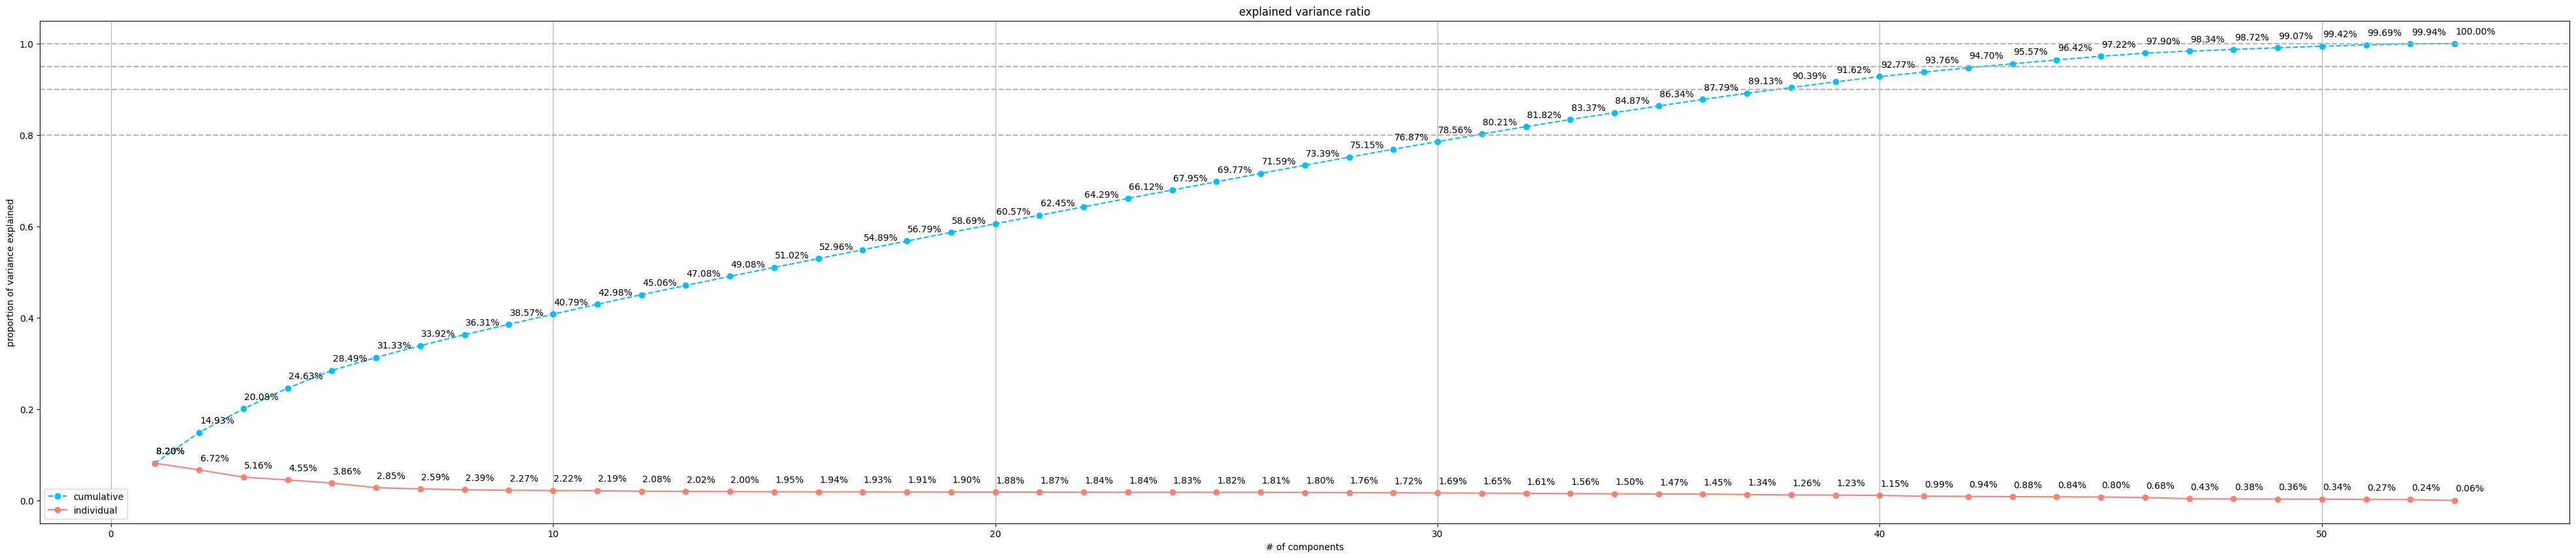

In [73]:
# ในส่วนที่ทำ Scree Plot
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(50, 10)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components + 1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker='o', label='cumulative', color='deepskyblue')

    plt.plot(x, y1, linestyle='-', marker='o', label='individual', color='salmon')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
            plt.text(n + .02, v + .02, f'{v * 100:.2f}%', fontsize=10)
            if with_cumulative:
                plt.text(n + .02, cv + .02, f'{cv * 100:.2f}%', fontsize=10)

    plt.show()
scree_plot(scale_data, n_components=53, with_cumulative=True, show_data_label=True)



คอลัมน์ที่เรามีคือ 53 คอลัมน์ ในการลดจำนวนโดยทั้วไปพิจารณาที่ 90-95 % ขึ้นไป (อ้างอิง: กอบเกียรติ สระอุบล, เรียนรู้ Data Science และ AI:Machine learning ด้วย python (2563 )
หากเลือกที่ 38 componant จะอธิบายข้อมูลได้ 90.39 % (จะเอามากกว่านี้ก็ได้)

In [75]:
pca.components_ # Eigenvectors

array([[ 5.65388327e-02,  2.67322142e-01, -2.16640324e-02, ...,
         1.32815941e-01, -6.20823641e-02,  3.79994249e-02],
       [-4.25246079e-02,  4.74402996e-02,  8.36630788e-02, ...,
         3.22229237e-01, -2.25973452e-01, -3.91722525e-02],
       [ 2.12123965e-01, -1.22406782e-01,  7.64015708e-02, ...,
        -1.01225699e-01,  1.21720363e-01,  9.64621301e-02],
       ...,
       [-2.44439192e-03,  3.94520942e-02, -1.63629464e-02, ...,
         4.01091181e-03,  1.25282323e-04,  1.66567228e-02],
       [ 4.72737728e-02,  2.77351518e-02, -3.11905844e-03, ...,
         5.38845118e-03, -1.58716846e-02,  8.48749699e-01],
       [ 1.06494536e-02,  7.05400319e-03, -6.18552600e-04, ...,
         1.58426693e-02,  1.10864745e-03, -3.94941790e-02]])

In [76]:
import pandas as pd

# ให้ features ของ scale_data เป็น index
dpc = pd.DataFrame(pca.components_.T,
                   index=scale_data.columns,
                   columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4)

# ทำการแปลงข้อมูลให้เป็น DataFrame ที่มีขนาดเล็กขึ้น (ในที่นี้เลือก 5 แถวแรก)
dpc_small = dpc.iloc[:27, :]
dpc_small.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
Age,0.056500,-0.042500,0.212100,-0.050700,-0.166400,-0.008900,-0.005700,-0.212000,-0.439300,0.233500,-0.066600,0.135300,0.104800,-0.042500,0.103700,-0.010300,-0.012400,0.015000,-0.020200,-0.009400,-0.029800,-0.007800,-0.067900,-0.024700,-0.049100,-0.003200,-0.019200,0.108800,0.017100,-0.112200,-0.018100,0.200400,-0.342900,0.005800,0.043100,0.032500,-0.057900,0.289100,-0.501000,0.025200,0.060700,-0.099600,0.055800,0.027200,0.084000,0.132200,0.017700,0.001500,-0.019200,-0.038800,-0.002400,0.047300,0.010600
InPatient,0.267300,0.047400,-0.122400,-0.103800,-0.117200,-0.171300,-0.326300,-0.273400,0.236700,-0.023800,-0.151500,0.096000,0.122300,-0.063100,0.028800,-0.064300,-0.049700,0.060200,0.016200,-0.028800,0.006500,0.059200,0.021400,0.023700,0.154200,0.016000,-0.017200,0.201000,-0.075800,-0.052200,-0.056300,-0.003700,0.092500,-0.030300,0.008500,-0.054400,0.007000,-0.016900,0.039700,0.041100,0.020100,-0.050300,-0.022300,-0.042200,0.042700,-0.016800,0.050500,-0.141000,-0.042200,-0.652300,0.039500,0.027700,0.007100
G1M5-Diuretic,-0.021700,0.083700,0.076400,-0.034200,0.004500,-0.001300,0.238900,-0.229600,0.144800,0.268300,0.211800,-0.028400,0.407100,-0.051900,-0.061700,-0.006400,0.020800,-0.044700,0.073400,-0.061300,-0.010300,0.120800,-0.065700,-0.044700,-0.067800,0.158300,-0.031900,0.060600,0.181200,-0.177000,0.288300,-0.166800,0.255600,0.301700,-0.222600,0.288200,-0.070400,-0.129400,-0.067500,-0.050000,-0.016300,-0.051800,0.006900,0.009500,0.011000,0.035600,0.012800,-0.007400,0.006600,0.009700,-0.016400,-0.003100,-0.000600
G1M6-MRA,0.014400,0.009800,0.000100,-0.041100,-0.028200,0.063500,0.281000,-0.056900,0.176200,0.066500,0.245100,-0.038700,0.404900,-0.012900,-0.038900,-0.058200,-0.065500,-0.065100,0.143400,-0.154900,-0.041500,0.150100,-0.075400,-0.039600,0.168800,-0.156600,0.273000,-0.051400,-0.333800,0.409700,-0.241900,0.045500,-0.239600,-0.084200,0.106000,-0.082200,-0.055800,0.006400,0.026200,0.035500,0.030000,-0.003000,-0.017700,-0.012900,0.015100,0.002800,0.005300,0.030600,-0.009800,0.002600,0.004700,-0.000500,0.001600
G2M2-Metformin,-0.135900,0.228100,0.178400,0.127500,-0.197400,-0.249600,0.137600,-0.078600,0.074500,-0.120800,-0.068900,-0.067400,-0.063800,0.023400,0.050500,-0.044000,0.010800,0.019100,-0.014800,0.053000,0.020900,-0.047200,0.011900,0.039300,0.085200,0.023500,0.005000,-0.001700,0.002500,0.010600,0.046300,-0.116200,-0.049700,-0.024700,-0.058200,-0.121100,-0.099500,-0.053200,0.082900,-0.038700,0.586400,-0.024500,0.336100,0.410400,0.058000,0.042200,-0.098800,0.003600,0.044000,-0.006500,0.000500,0.000700,0.002900
G3M3-Fibrate,-0.049400,0.059000,-0.000400,0.017100,-0.003400,-0.139600,-0.028100,0.223700,0.044100,-0.073600,-0.038300,0.084600,0.282200,-0.158700,-0.028000,-0.237300,-0.096000,0.006700,-0.024300,-0.130400,0.077100,-0.076800,0.573700,-0.281200,0.161200,0.058800,-0.240800,-0.247900,0.200600,-0.016900,0.053600,0.130900,-0.218300,-0.108200,-0.035800,0.133800,-0.011700,-0.010100,0.001200,0.047400,0.005000,-0.037500,-0.019400,-0.052400,-0.052600,-0.025500,-0.007200,-0.013000,0.000500,-0.000300,0.008800,0.000100,0.000100
G5M1-Ketoanalog-amino-acid,0.002300,0.024600,0.086900,-0.048200,0.030700,0.199000,-0.077900,0.127400,-0.067000,-0.037500,-0.135000,0.146200,-0.022800,-0.196900,-0.098600,-0.189400,-0.089300,-0.048500,-0.197100,-0.178700,0.139700,0.435100,-0.105300,0.267100,0.198400,-0.004900,0.404800,-0.122900,0.146800,-0.125400,0.341200,0.030800,-0.019300,-0.167300,-0.022000,-0.096100,-0.045800,-0.026700,0.041900,-0.056900,0.005200,-0.051100,0.028400,0.013000,-0.027600,0.021700,-0.008900,0.004900,0.001600,0.005200,0.004800,0.002100,-0.000700
BMI,-0.162200,0.194700,-0.144100,-0.199700,-0.062400,-0.037700,-0.124300,-0.118300,-0.021600,-0.143600,0.158800,-0.03140

<Axes: >

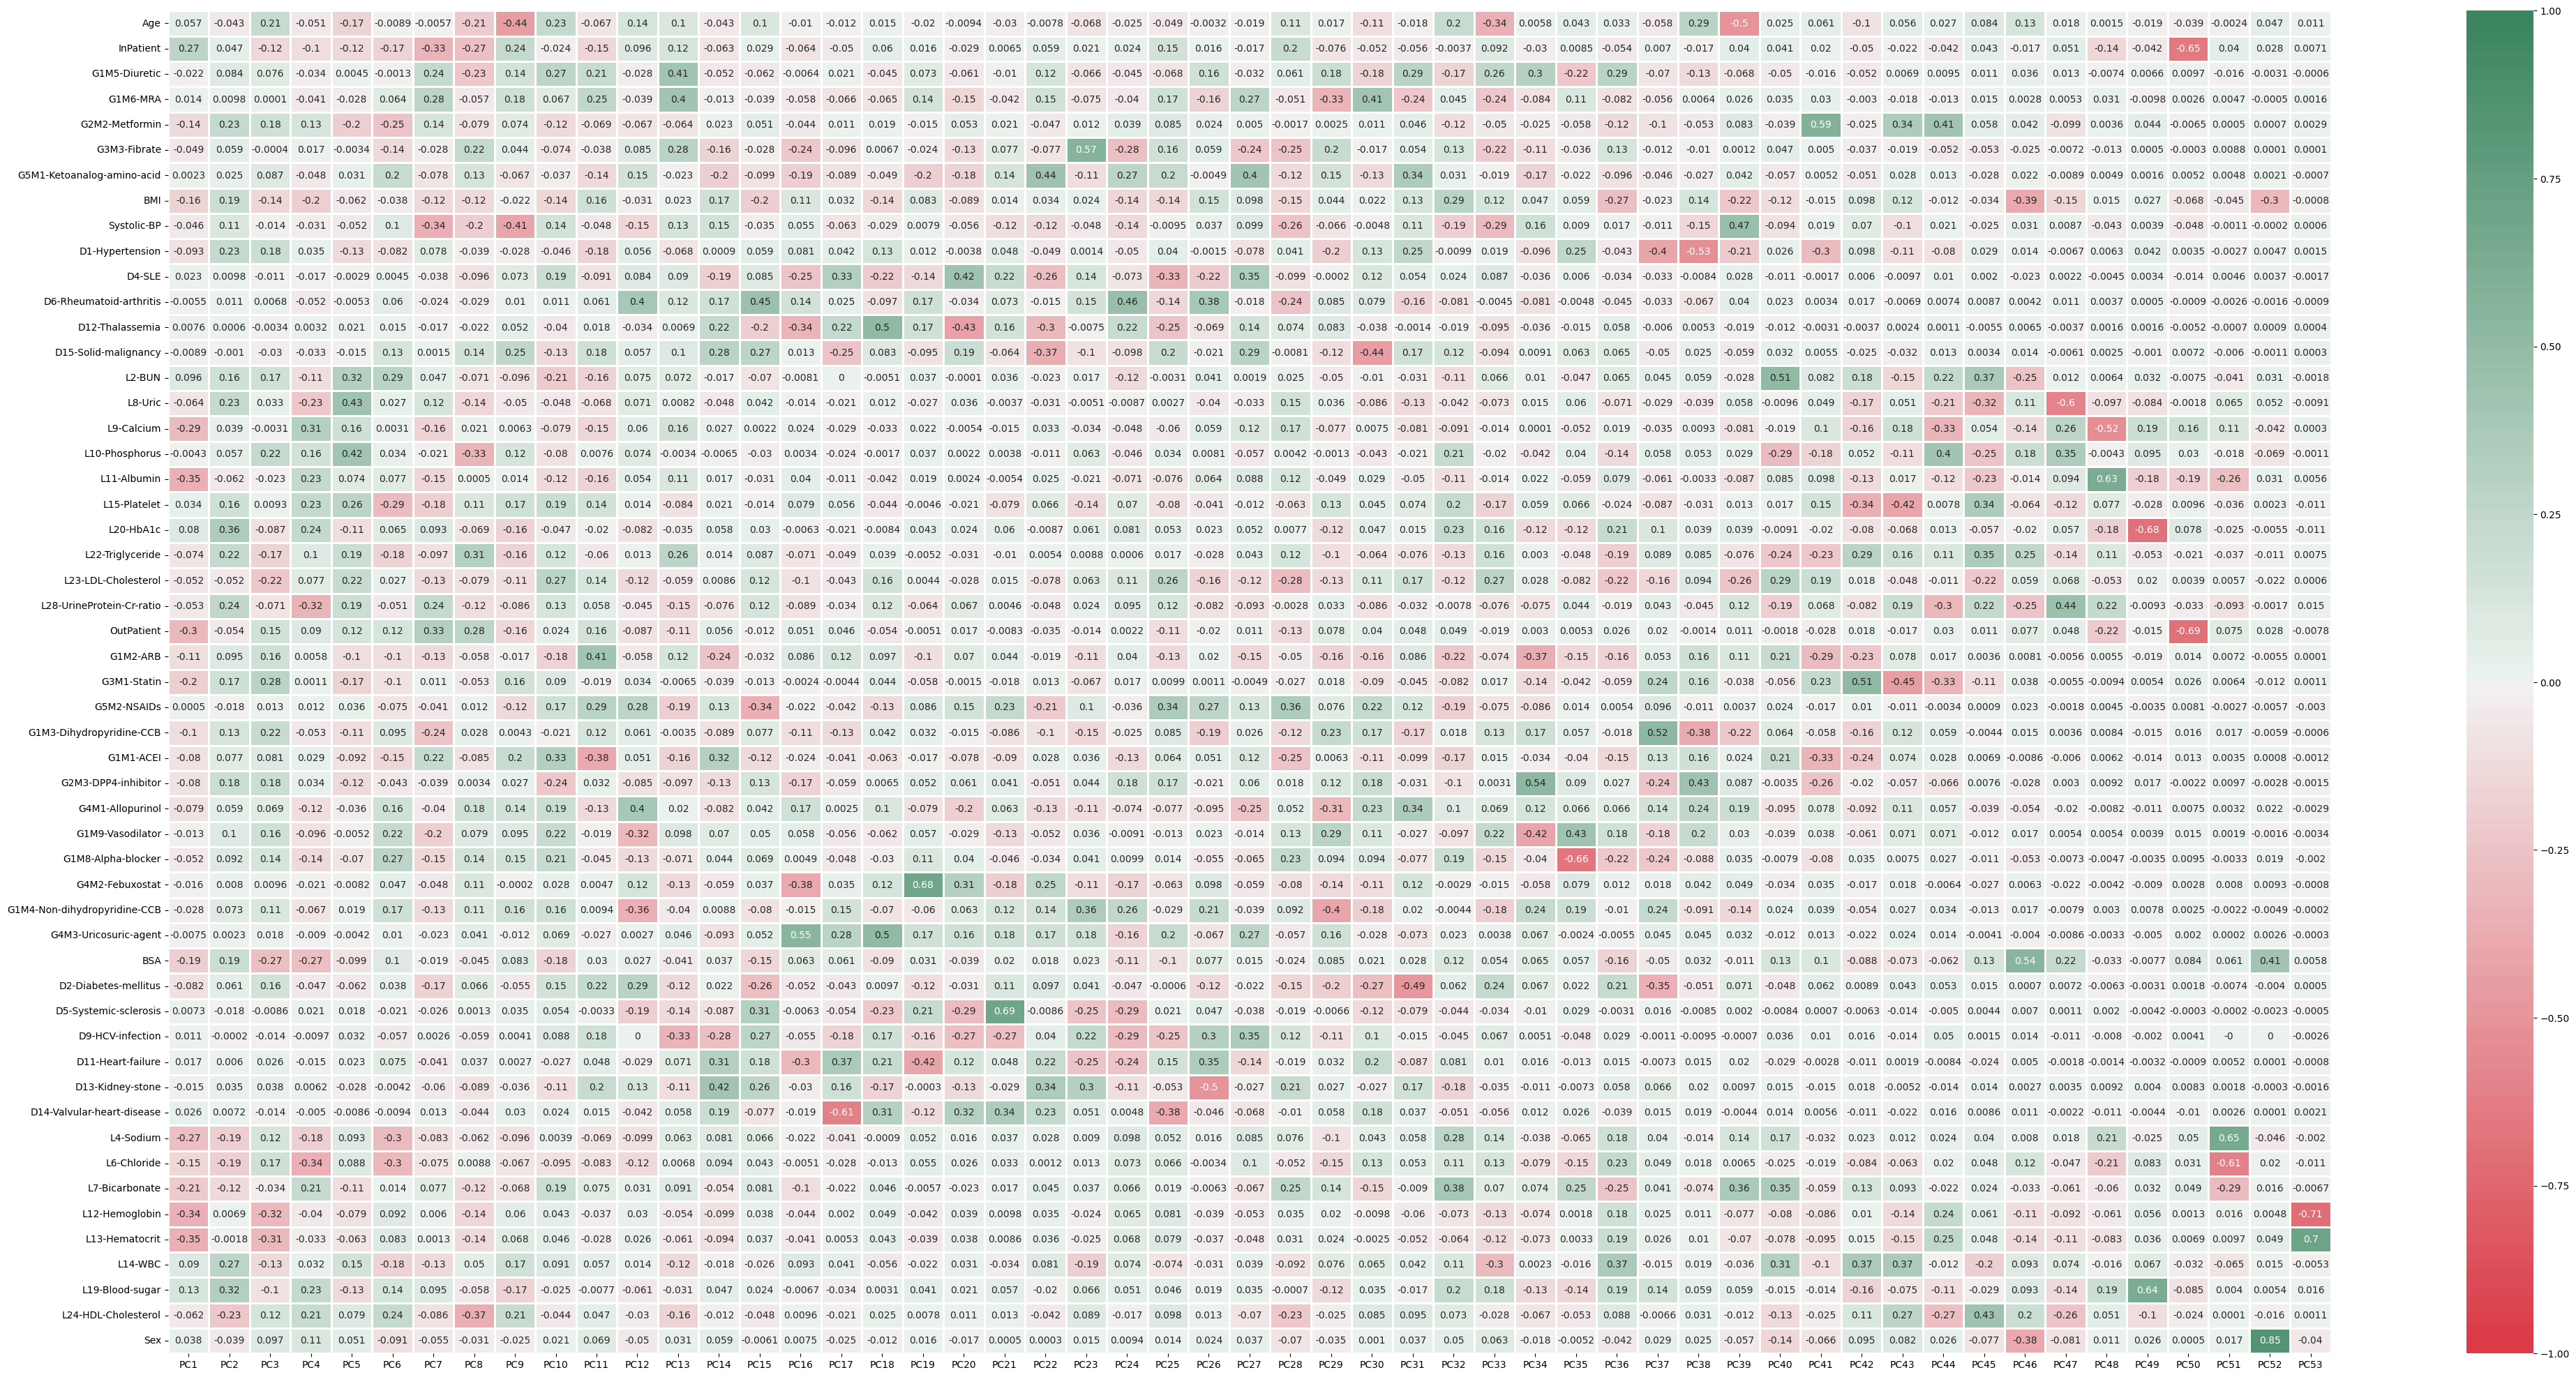

In [78]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1,
            center=0, annot=True, vmin=-1, vmax=1)